In [2]:
import numpy as np
import pandas as pd
from woocommerce import API
import timeout_decorator
import json
from sys import platform
import seaborn as sns
import random
import collections



In [3]:
wcapi = API(
    url="http://localhost/wordpress",
    consumer_key="ck_29870b1cca39145bcaa62d266e2c097c9bc5cca2",
    consumer_secret="cs_f43b1c0b4d995487e58ff885cf32a45b8217db63",
    wp_api=True,
    version="wc/v3",
    timeout=900000
)

In [69]:
def popular_clientes():
    text = open('usuarios_woocommerce.json').read()
    customers = json.loads(text)

    for i in customers:
        print(wcapi.post("customers", i).json())

popular_clientes()

KeyboardInterrupt: 

In [ ]:
def popular_produtos():
    text = open('produtos_woocommerce.json').read()
    products = json.loads(text)

    for i in products:
        print(wcapi.post("products", i).json())

popular_produtos()

{'id': 19, 'name': 'Dakota Club', 'slug': 'dakota-club', 'permalink': 'http://localhost/wordpress/index.php/produto/dakota-club/', 'date_created': '2022-08-14T14:55:56', 'date_created_gmt': '2022-08-14T17:55:56', 'date_modified': '2022-08-14T14:55:56', 'date_modified_gmt': '2022-08-14T17:55:56', 'type': 'simple', 'status': 'publish', 'featured': False, 'catalog_visibility': 'visible', 'description': 'ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia curae donec pharetra magna vestibulum aliquet ultrices', 'short_description': 'eu nibh', 'sku': '', 'price': '25918.59', 'regular_price': '25918.59', 'sale_price': '', 'date_on_sale_from': None, 'date_on_sale_from_gmt': None, 'date_on_sale_to': None, 'date_on_sale_to_gmt': None, 'on_sale': False, 'purchasable': True, 'total_sales': 0, 'virtual': False, 'downloadable': False, 'downloads': [], 'download_limit': -1, 'download_expiry': -1, 'external_url': '', 'button_text': '', 'tax_status': 'taxable', 'tax_class': '', 'mana

In [4]:
def generate_popular_numbers(avg, std_dev, number_of_reviews, bigger, smaller, conver_int):     
    pct_to_target = np.random.normal(avg, std_dev, number_of_reviews).round(2)
    
    pct_to_target = filter(lambda x: x > smaller and x < bigger, pct_to_target)
    pct_to_target = list(pct_to_target)
    
    if(conver_int):
        pct_to_target = map(lambda x: int(x), pct_to_target)
        pct_to_target = list(pct_to_target)
    
    return pct_to_target


<AxesSubplot:xlabel='Count'>

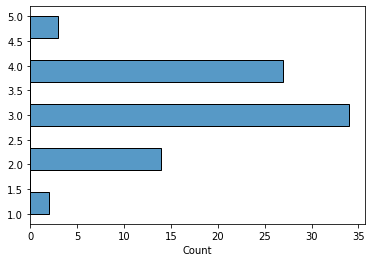

In [5]:
popular_rating = generate_popular_numbers(4.2, 1, 100, 5.1, 0, True)
sns.histplot(y=popular_rating)

In [78]:
def get_one_random_item(list):
    invalid_number = [360, 792]
    is_valid = False;
    while not is_valid:
        random_index = random.randint(1,len(list) - 1)
        if (list[random_index] not in invalid_number):
            return list[random_index]
            
     

get_one_random_item(best_customers)

712

In [ ]:
def get_random_customer():
    random_cutomer_id = randint(3,1000)

    return wcapi.get(f"customers/{random_cutomer_id}").json()

get_random_customer()

{'id': 474,
 'date_created': '2022-08-14T12:31:59',
 'date_created_gmt': '2022-08-14T15:31:59',
 'date_modified': '2022-08-14T12:32:05',
 'date_modified_gmt': '2022-08-14T15:32:05',
 'email': 'mchaddockd2@weather.com',
 'first_name': 'Erma',
 'last_name': 'Carnegy',
 'role': 'customer',
 'username': 'mchaddockd2',
 'billing': {'first_name': 'Minerva',
  'last_name': 'Chaddock',
  'company': 'Pixoboo',
  'address_1': '1 Manufacturers Road',
  'address_2': '9698 Shoshone Street',
  'city': 'Buffalo',
  'postcode': '14205',
  'country': 'United States',
  'state': 'New York',
  'email': 'mchaddockd2@engadget.com',
  'phone': '7167053630'},
 'shipping': {'first_name': '',
  'last_name': '',
  'company': '',
  'address_1': '',
  'address_2': '',
  'city': '',
  'postcode': '',
  'country': '',
  'state': '',
  'phone': ''},
 'is_paying_customer': False,
 'avatar_url': 'http://2.gravatar.com/avatar/2dfdd43f222ff99feb2f2f8c7a0eabb2?s=96&d=mm&r=g',
 'meta_data': [],
 '_links': {'self': [{'href

In [103]:
customers = wcapi.get("customers", params={'per_page':100}).json()
len(customers)

100

In [ ]:
def generate_review(produtcts, reviews, customers):
    product = get_one_random_item(produtcts)
    rating = get_one_random_item(reviews)

    random_cutomer_id = randint(3,99)

    customer = customers[random_cutomer_id]
    return dict({
        "product_id": product,
        "review": "Random review",
        "reviewer": customer['first_name'] + " " + customer['last_name'],
        "reviewer_email": customer['email'],
        "rating": rating
    })

generate_review(popular_products, popular_rating, customers)

{'product_id': 76,
 'review': 'Random review',
 'reviewer': 'Nilson Shilton',
 'reviewer_email': 'acutbushil@homestead.com',
 'rating': 3}

In [122]:
def generate_reviews(produtcts, reviews, number_of_simulations, customers):
    random_reviews = []

    for _ in range(number_of_simulations):
        new_review = generate_review(produtcts, reviews, customers)
        random_reviews.append(new_review)
    
    return random_reviews

reviews = generate_reviews(popular_products, popular_rating, 600, customers)
reviews

[{'product_id': 52,
  'review': 'Random review',
  'reviewer': 'Nilson Shilton',
  'reviewer_email': 'acutbushil@homestead.com',
  'rating': 2},
 {'product_id': 28,
  'review': 'Random review',
  'reviewer': 'Vinnie Morrell',
  'reviewer_email': 'bdochonm4@who.int',
  'rating': 4},
 {'product_id': 53,
  'review': 'Random review',
  'reviewer': 'Hadleigh Klemt',
  'reviewer_email': 'ascuddersh6@google.co.uk',
  'rating': 5},
 {'product_id': 73,
  'review': 'Random review',
  'reviewer': 'Brandea Habben',
  'reviewer_email': 'areynishjm@zimbio.com',
  'rating': 4},
 {'product_id': 76,
  'review': 'Random review',
  'reviewer': 'Valery Vittori',
  'reviewer_email': 'alakemanad@trellian.com',
  'rating': 3},
 {'product_id': 21,
  'review': 'Random review',
  'reviewer': 'Preston Lambregts',
  'reviewer_email': 'apleassp1@hexun.com',
  'rating': 4},
 {'product_id': 26,
  'review': 'Random review',
  'reviewer': 'Catlee Moreman',
  'reviewer_email': 'ahalbord9k@dell.com',
  'rating': 4},
 {'

In [123]:
reviews
for r in reviews: 
    print(wcapi.post("products/reviews", r).json())

{'id': 81, 'date_created': '2022-08-20T16:24:57', 'date_created_gmt': '2022-08-20T19:24:57', 'product_id': 52, 'product_name': 'Avalon', 'product_permalink': 'http://localhost/wordpress/index.php/produto/avalon/', 'status': 'approved', 'reviewer': 'Nilson Shilton', 'reviewer_email': 'acutbushil@homestead.com', 'review': 'Random review', 'rating': 2, 'verified': False, 'reviewer_avatar_urls': {'24': 'http://1.gravatar.com/avatar/118726586afd0bb6fa73c250593ab095?s=24&d=mm&r=g', '48': 'http://1.gravatar.com/avatar/118726586afd0bb6fa73c250593ab095?s=48&d=mm&r=g', '96': 'http://1.gravatar.com/avatar/118726586afd0bb6fa73c250593ab095?s=96&d=mm&r=g'}, '_links': {'self': [{'href': 'http://localhost/wordpress/index.php/wp-json/wc/v3/products/reviews/81'}], 'collection': [{'href': 'http://localhost/wordpress/index.php/wp-json/wc/v3/products/reviews'}], 'up': [{'href': 'http://localhost/wordpress/index.php/wp-json/wc/v3/products/52'}]}}
{'id': 82, 'date_created': '2022-08-20T16:25:09', 'date_creat

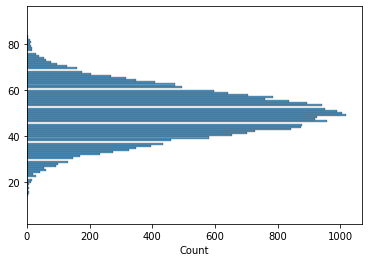

In [99]:
popular_products = generate_popular_numbers(50, 10, 25000, 117, 1, True)
popular_products.sort()
sns.histplot(y=popular_products)

clone_products = popular_products

<AxesSubplot:xlabel='Count'>

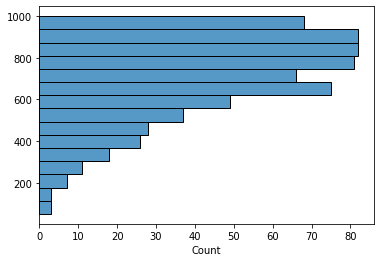

In [51]:
best_customers = generate_popular_numbers(900, 300, 1000, 1000, 1, True)
best_customers.sort()
sns.histplot(y=best_customers)

<AxesSubplot:xlabel='Count'>

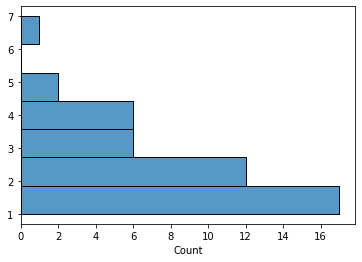

In [39]:
variancia_itens_carrinho = generate_popular_numbers(1, 2, 100, 10, 1, True)
variancia_itens_carrinho
sns.histplot(y=variancia_itens_carrinho)
# variancia_itens_carrinho

In [22]:
# dados_produtos = wcapi.get("products",params={'per_page':100}).json()
dados_produtos = wcapi.get("products",params={'per_page':100}).json()

In [23]:
dt_product = pd.DataFrame(dados_produtos)
dt_product



id          name          slug  \
0   118        Escape        escape   
1   117  Escalade ESV  escalade-esv   
2   116       Phantom     phantom-2   
3   115            QX            qx   
4   114    Expedition  expedition-2   
..  ...           ...           ...   
95   23        Mazda6        mazda6   
96   22     SLK-Class     slk-class   
97   21   Sierra 2500   sierra-2500   
98   20       Caravan       caravan   
99   19   Dakota Club   dakota-club   

                                            permalink         date_created  \
0   http://localhost/wordpress/index.php/produto/e...  2022-08-14T15:10:15   
1   http://localhost/wordpress/index.php/produto/e...  2022-08-14T15:10:07   
2   http://localhost/wordpress/index.php/produto/p...  2022-08-14T15:09:59   
3    http://localhost/wordpress/index.php/produto/qx/  2022-08-14T15:09:52   
4   http://localhost/wordpress/index.php/produto/e...  2022-08-14T15:09:42   
..                                                ...                  ...   
95  http://localhost/wordpress/index.php/produto/m...  2022-08-14T14:56:27   
96  http://localhost/wordpress/index.php/produto/s...  2022-08-14T14:56:20   
97  http://localhost/wordpress/index.php/produto/s...  2022-08-14T14:56:13   
98  http://localhost/wordpress/index.php/produto/c...  2022-08-14T14:56:04   
99  http://localhost/wordpress/index.php/produto/d...  2022-08-14T14:55:56   

       date_created_gmt        date_modified    date_modified_gmt    type  \
0   2022-08-14T18:10:15  2022-08-14T15:10:15  2022-08-14T18:10:15  simple   
1   2022-08-14T18:10:07  2022-08-14T15:10:07  2022-08-14T18:10:07  simple   
2   2022-08-14T18:09:59  2022-08-14T15:09:59  2022-08-14T18:09:59  simple   
3   2022-08-14T18:09:52  2022-08-14T15:09:52  2022-08-14T18:09:52  simple   
4   2022-08-14T18:09:42  2022-08-14T15:09:42  2022-08-14T18:09:42  simple   
..                  ...                  ...                  ...     ...   
95  2022-08-14T17:56:27  2022-08-20T14:45:58  2022-08-20T17:45:58  simple   
96  2022-08-14T17:56:20  2022-08-20T17:12:43  2022-08-20T20:12:43  simple   
97  2022-08-14T17:56:13  2022-08-20T16:58:27  2022-08-20T19:58:27  simple   
98  2022-08-14T17:56:04  2022-08-20T16:39:07  2022-08-20T19:39:07  simple   
99  2022-08-14T17:55:56  2022-08-20T17:06:34  2022-08-20T20:06:34  simple   

     status  ...  default_attributes variations grouped_products menu_order  \
0   publish  ...                  []         []               []          0   
1   publish  ...                  []         []               []          0   
2   publish  ...                  []         []               []          0   
3   publish  ...                  []         []               []          0   
4   publish  ...                  []         []               []          0   
..      ...  ...                 ...        ...              ...        ...   
95  publish  ...                  []         []               []          0   
96  publish  ...                  []         []               []          0   
97  publish  ...                  []         []               []          0   
98  publish  ...                  []         []               []          0   
99  publish  ...                  []         []               []          0   

                                           price_html            related_ids  \
0   <span class="woocommerce-Price-amount amount">...   [70, 52, 62, 59, 68]   
1   <span class="woocommerce-Price-amount amount">...   [35, 36, 83, 71, 84]   
2   <span class="woocommerce-Price-amount amount">...   [54, 62, 37, 76, 27]   
3   <span class="woocommerce-Price-amount amount">...   [60, 50, 25, 44, 46]   
4   <span class="woocommerce-Price-amount amount">...   [63, 28, 74, 64, 65]   
..                                                ...                    ...   
95  <span class="woocommerce-Price-amount amount">...  [84, 70, 108, 52, 78]   
96  <span class="woocommerce-Price-amount amount">...   [49, 48, 33, 60, 44]   
97  <

In [24]:
dados_clientes = []
for i in range(1, 11):
    retorno_clientes = wcapi.get("customers", params={'per_page':100, 'page': i}).json()
    for c in retorno_clientes:
        dados_clientes.append(c)

dados_clientes

[{'id': 111,
  'date_created': '2022-08-14T11:30:18',
  'date_created_gmt': '2022-08-14T14:30:18',
  'date_modified': '2022-08-14T11:30:24',
  'date_modified_gmt': '2022-08-14T14:30:24',
  'email': 'aadamkiewicz2z@nationalgeographic.com',
  'first_name': 'Fonzie',
  'last_name': 'Handlin',
  'role': 'customer',
  'username': 'aadamkiewicz2z',
  'billing': {'first_name': 'Ambur',
   'last_name': 'Adamkiewicz',
   'company': 'Photospace',
   'address_1': '683 Gina Point',
   'address_2': '65 Cottonwood Avenue',
   'city': 'Jackson',
   'postcode': '39210',
   'country': 'United States',
   'state': 'Mississippi',
   'email': 'aadamkiewicz2z@behance.net',
   'phone': '6016548887'},
  'shipping': {'first_name': '',
   'last_name': '',
   'company': '',
   'address_1': '',
   'address_2': '',
   'city': '',
   'postcode': '',
   'country': '',
   'state': '',
   'phone': ''},
  'is_paying_customer': False,
  'avatar_url': 'http://0.gravatar.com/avatar/3daf0e76f182d7c745f693e5a7805f9c?s=96&d

In [63]:
dt_customer = pd.DataFrame(dados_clientes)
dt_customer

id         date_created     date_created_gmt        date_modified  \
0     111  2022-08-14T11:30:18  2022-08-14T14:30:18  2022-08-14T11:30:24   
1     160  2022-08-14T11:37:35  2022-08-14T14:37:35  2022-08-14T11:37:40   
2    1000  2022-08-14T14:09:27  2022-08-14T17:09:27  2022-08-14T14:09:34   
3     697  2022-08-14T13:11:12  2022-08-14T16:11:12  2022-08-14T13:11:18   
4     924  2022-08-14T13:54:25  2022-08-14T16:54:25  2022-08-14T13:54:31   
..    ...                  ...                  ...                  ...   
995   780  2022-08-14T13:25:50  2022-08-14T16:25:50  2022-08-14T13:25:56   
996   440  2022-08-14T12:26:18  2022-08-14T15:26:18  2022-08-14T12:26:24   
997   151  2022-08-14T11:36:15  2022-08-14T14:36:15  2022-08-14T11:36:20   
998   568  2022-08-14T12:49:30  2022-08-14T15:49:30  2022-08-14T12:49:37   
999   182  2022-08-14T11:40:51  2022-08-14T14:40:51  2022-08-14T11:40:56   

       date_modified_gmt                                  email first_name  \
0    2022-08-14T14:30:24  aadamkiewicz2z@nationalgeographic.com     Fonzie   
1    2022-08-14T14:37:40                  aallibone4c@europa.eu      Renee   
2    2022-08-14T17:09:34                  aaubriro@mashable.com   Adelbert   
3    2022-08-14T16:11:18                     abannardj9@ftc.gov  Ezmeralda   
4    2022-08-14T16:54:31                      abenfellpk@gov.uk     Anette   
..                   ...                                    ...        ...   
995  2022-08-14T16:25:56             ywickeylk@seattletimes.com      Aldis   
996  2022-08-14T15:26:24                 zambrozikc4@abc.net.au     Lemmie   
997  2022-08-14T14:36:20               zcayette43@bigcartel.com       Otis   
998  2022-08-14T15:49:37                 zcornewellfo@globo.com      Aldon   
999  2022-08-14T14:40:56                 zdunseath4y@paypal.com      Arvin   

       last_name      role        username  \
0        Handlin  customer  aadamkiewicz2z   
1          Myrie  customer     aallibone4c   
2    Quarrington  customer        aaubriro   
3        Padgett  customer      abannardj9   
4        Beevors  customer      abenfellpk   
..           ...       ...             ...   
995        Biasi  customer       ywickeylk   
996        Eagar  customer     zambrozikc4   
997    Lorentzen  customer      zcayette43   
998      Merigot  customer    zcornewellfo   
999      Growden  customer     zdunseath4y   

                                               billing  \
0    {'first_name': 'Ambur', 'last_name': 'Adamkiew...   
1    {'first_name': 'Aretha', 'last_name': 'Allibon...   
2    {'first_name': 'Avictor', 'last_name': 'Aubri'...   
3    {'first_name': 'Aundrea', 'last_name': 'Bannar...   
4    {'first_name': 'Aili', 'last_name': 'Benfell',...   
..                                                 ...   
995  {'first_name': 'Yehudi', 'last_name': 'Wickey'...   
996  {'first_name': 'Zoe', 'last_name': 'Ambrozik',...   
997  {'first_name': 'Zaria', 'last_name': 'Cayette'...   
998  {'first_name': 'Zelda', 'last_name': 'Cornewel...   
999  {'first_name': 'Zsa zsa', 'last_name': 'Dunsea...   

                                              shipping  is_paying_customer  \
0    {'first_name': '', 'last_name': '', 'company':...               False   
1    {'first_name': '', 'last_name': '', 'company':...               False   
2    {'first_name': '', 'last_name': '', 'company':...               False   
3    {'first_name': '', 'last_name': '', 'company':...               False   
4    {'first_name': '', 'last_name': '', 'company':...               False   
..                                                 ...                 ...   
995  {'first_name': '', 'last_name': '', 'company':...               False   
996  {'first_name': '', 'last_name': '', 'company':...               False   
997  {'first_name': '', 'last_name': '', 'company':...               False   
998  {'first_name': '', 'last_name': '', 'company':...               False   
999  {'first_name': '', 'last_name': '', 'company

In [100]:
def generate_orders():
    orders = []
    while len(popular_products) != 0:
        customer_id = get_one_random_item(best_customers)

        produtos_carrinho = []
        numero_itens_carrinho = random.randint(1,len(variancia_itens_carrinho) - 1)

        if(len(popular_products) <= 1):
            # popular_products = []
            break
        for i in range(variancia_itens_carrinho[numero_itens_carrinho]):

            try:
                product_id = random.randint(1,len(popular_products) - 1)
            except:
                print("ERRO: ID ALEATORIO")
                break
            # produtos_carrinho.append([popular_products[product_id], product_id])
            produtos_carrinho.append(popular_products[product_id])
            popular_products.pop(product_id)

        counter = collections.Counter(produtos_carrinho)
        counter = dict(counter)

        line_items = []
        total = 0.0
        for chave, valor in counter.items():
            line_items.append({
                "product_id": chave,
                "quantity": valor
            })

            try:
                total += float(dt_product[dt_product.id == chave]['price'])
            except:
                print("ERRO: PRECO PRODUTO")
                continue    
        
        try:
            index = dt_customer[dt_customer.id == customer_id].index

            billing = dict(dt_customer[dt_customer.id == customer_id]['billing'])[index[0]]
            shipping = dict(dt_customer[dt_customer.id == customer_id]['shipping'])[index[0]]
        except:
            print("ERRO: DADOS CLIENTES")
            print(customer_id)
            continue  

        data = {
            "payment_method": "bacs",
            "payment_method_title": "Direct Bank Transfer",
            "set_paid": True,
            "billing": billing,
            "shipping": shipping,
            "line_items":  line_items,
            "shipping_lines": [
                {
                    "method_id": "flat_rate",
                    "method_title": "Flat Rate",
                    "total": str(total)
                }
            ]
        }

        orders.append(data)
        
    return orders

new_orders = generate_orders()
new_orders

ERRO: PRECO PRODUTO
ERRO: PRECO PRODUTO
ERRO: PRECO PRODUTO
ERRO: PRECO PRODUTO
ERRO: PRECO PRODUTO
ERRO: PRECO PRODUTO
ERRO: PRECO PRODUTO
ERRO: PRECO PRODUTO
ERRO: PRECO PRODUTO
ERRO: PRECO PRODUTO
ERRO: PRECO PRODUTO
ERRO: PRECO PRODUTO
ERRO: PRECO PRODUTO
ERRO: PRECO PRODUTO
ERRO: PRECO PRODUTO
ERRO: PRECO PRODUTO
ERRO: PRECO PRODUTO
ERRO: PRECO PRODUTO
ERRO: PRECO PRODUTO
ERRO: PRECO PRODUTO
ERRO: PRECO PRODUTO
ERRO: PRECO PRODUTO
ERRO: PRECO PRODUTO
ERRO: PRECO PRODUTO
ERRO: PRECO PRODUTO
ERRO: PRECO PRODUTO
ERRO: PRECO PRODUTO
ERRO: PRECO PRODUTO
ERRO: PRECO PRODUTO


[{'payment_method': 'bacs',
  'payment_method_title': 'Direct Bank Transfer',
  'set_paid': True,
  'billing': {'first_name': 'Aristotle',
   'last_name': 'Cristoforetti',
   'company': 'Bubbletube',
   'address_1': '0672 Aberg Road',
   'address_2': '9 Troy Drive',
   'city': 'Newark',
   'postcode': '07112',
   'country': 'United States',
   'state': 'New Jersey',
   'email': 'acristoforettikh@geocities.com',
   'phone': '2017711871'},
  'shipping': {'first_name': '',
   'last_name': '',
   'company': '',
   'address_1': '',
   'address_2': '',
   'city': '',
   'postcode': '',
   'country': '',
   'state': '',
   'phone': ''},
  'line_items': [{'product_id': 29, 'quantity': 1},
   {'product_id': 42, 'quantity': 1}],
  'shipping_lines': [{'method_id': 'flat_rate',
    'method_title': 'Flat Rate',
    'total': '185555.91999999998'}]},
 {'payment_method': 'bacs',
  'payment_method_title': 'Direct Bank Transfer',
  'set_paid': True,
  'billing': {'first_name': 'Selby',
   'last_name': '

In [88]:
dt_orders = pd.DataFrame(new_orders)


In [102]:
for o in new_orders:
    print(wcapi.post("orders", o).json())
new_orders[0]['shipping_lines'][0]['total']


{'id': 120, 'parent_id': 0, 'status': 'processing', 'currency': 'BRL', 'version': '6.5.1', 'prices_include_tax': False, 'date_created': '2022-08-21T11:05:43', 'date_modified': '2022-08-21T11:05:53', 'discount_total': '0.00', 'discount_tax': '0.00', 'shipping_total': '185555.92', 'shipping_tax': '0.00', 'cart_tax': '0.00', 'total': '371111.84', 'total_tax': '0.00', 'customer_id': 0, 'order_key': 'wc_order_q3jkm022bkLvY', 'billing': {'first_name': 'Aristotle', 'last_name': 'Cristoforetti', 'company': 'Bubbletube', 'address_1': '0672 Aberg Road', 'address_2': '9 Troy Drive', 'city': 'Newark', 'state': 'New Jersey', 'postcode': '07112', 'country': 'United States', 'email': 'acristoforettikh@geocities.com', 'phone': '2017711871'}, 'shipping': {'first_name': '', 'last_name': '', 'company': '', 'address_1': '', 'address_2': '', 'city': '', 'state': '', 'postcode': '', 'country': '', 'phone': ''}, 'payment_method': 'bacs', 'payment_method_title': 'Direct Bank Transfer', 'transaction_id': '', '